**We have done some exploratory data analysis in this notebook**

In [ ]:
import pandas as pd
import json

In [ ]:
with open('immigration.json', 'r') as f:
    data = json.load(f)

In [ ]:
data

{'Immigration1.0-22482': {'byline': 'Sylvia Moreno, Washington Post Staff Writer',
  'title': 'A Set of Borders to Cross; For Children Seeking Immigrant Relatives in U.S., Journey Is Twofold',
  'section': 'a section',
  'month': 10,
  'source': 'washington post',
  'length': 1894.0,
  'year': 2006,
  'irrelevant': False,
  'annotations': {'tone': {'annotator3_54.0_r': [{'start': 11,
      'code': 17.35,
      'end': 18}],
    'annotator11_54.0_r': [{'start': 11, 'code': 17.35, 'end': 18}]},
   'irrelevant': {'annotator3_54.0_r': False, 'annotator11_54.0_r': False},
   'framing': {'annotator3_54.0_r': [{'start': 11, 'code': 10.2, 'end': 18},
     {'start': 20, 'code': 10.1, 'end': 115},
     {'start': 359, 'code': 10.0, 'end': 453},
     {'start': 519, 'code': 8.0, 'end': 717},
     {'start': 820, 'code': 7.0, 'end': 891},
     {'start': 719, 'code': 11.0, 'end': 892},
     {'start': 892, 'code': 10.0, 'end': 1046},
     {'start': 1048, 'code': 8.0, 'end': 1204},
     {'start': 1257, '

In the Json file each article on immigration is annotated by one or more annotators, they have identified 15 frames for the topic of immigtation and 3 tones. The number before the decimal point refers to the frame category, and the number after the decimal point refers to which part of the text was annotated. .1 refers to the frame of the headline, .2 refers to the main frame of the article and .0 refers to the secondary frames annotations across various texts in the article. In this Json file we only have the headlines to work with, not the entire article so we took the headline as input and the frame with .2 and .1 respectively as output to see if there is any difference between the accuracy between the two approaches. Often times during analysis of a newspaper article we would want to be able to get the main frame of the article from the headline, which is why we took the .2 values as well in our experiment. For the tone we just went with the three tones to start with pro, anti, neutral.

In [ ]:
# Define a function to extract data from the JSON structure
def extract_annotations(data):
    titles = []
    annotator_ids = []
    frame_codes = []
    tone_codes = []
    relevants = []

    # Iterate through each article in the JSON data
    for article_key, article_data in data.items():
        title = article_data.get('title', None)  # Extract title for each article

        # Skip articles without a title
        if not title:
            continue

        # Extract annotations if available
        annotations = article_data.get('annotations', {})

        # Process tone and framing annotations separately
        for annotation_type in ['tone', 'framing']:
            for annotator_id, annot_list in annotations.get(annotation_type, {}).items():
                for annot in annot_list:
                    titles.append(title)
                    annotator_ids.append(annotator_id)

                    # Store codes based on annotation type and add None where not applicable
                    if annotation_type == 'framing':
                        frame_codes.append(annot['code'])
                        tone_codes.append(None)  # No tone code for framing annotations
                    elif annotation_type == 'tone':
                        tone_codes.append(annot['code'])
                        frame_codes.append(None)  # No frame code for tone annotations

                    # Extract relevance information if available
                    relevant_info = annotations.get('irrelevant', {}).get(annotator_id, True)  # True if not found
                    relevants.append(relevant_info)

    # Create a DataFrame from the extracted lists
    df = pd.DataFrame({
        'Title': titles,
        'Annotator ID': annotator_ids,
        'Frame Code': frame_codes,
        'Tone Code': tone_codes,
        'Relevant': relevants
    })

    return df

In [ ]:
df = extract_annotations(data)

# Display the DataFrame
print(df)

                                                   Title        Annotator ID  \
0      A Set of Borders to Cross; For Children Seekin...   annotator3_54.0_r   
1      A Set of Borders to Cross; For Children Seekin...  annotator11_54.0_r   
2      A Set of Borders to Cross; For Children Seekin...   annotator3_54.0_r   
3      A Set of Borders to Cross; For Children Seekin...   annotator3_54.0_r   
4      A Set of Borders to Cross; For Children Seekin...   annotator3_54.0_r   
...                                                  ...                 ...   
88722  GROWER CHARGED WITH HOLDING MIGRANTS AGAINST T...   annotator5_42.0_r   
88723  GROWER CHARGED WITH HOLDING MIGRANTS AGAINST T...   annotator5_42.0_r   
88724  GROWER CHARGED WITH HOLDING MIGRANTS AGAINST T...   annotator5_42.0_r   
88725  GROWER CHARGED WITH HOLDING MIGRANTS AGAINST T...   annotator5_42.0_r   
88726  GROWER CHARGED WITH HOLDING MIGRANTS AGAINST T...   annotator5_42.0_r   

       Frame Code  Tone Code  Relevant 

Find the number of unique annotators

In [ ]:
unique_annotators_count = df['Annotator ID'].nunique()
print(f"Number of unique annotators: {unique_annotators_count}")


Number of unique annotators: 202


In [ ]:
unique_annotator_counts = df.groupby('Title')['Annotator ID'].nunique().reset_index()
unique_annotator_counts.columns = ['Title', 'Unique Annotator Count']

# Display the resulting DataFrame with unique annotator count per title
print(unique_annotator_counts)

                                                  Title  \
0     !Bienvenidos!; As more Hispanic immigrants mov...   
1     "BLACK HAWK DOWN"; THE MOVIE; SOMALIS IN TWIN ...   
2     "THE IMMIGRANT" BLENDS STORY, DIALOGUE, CHARAC...   
3     "The economic gears of this country are depend...   
4     "We need new laws; we have to speak out; we ha...   
...                                                 ...   
4869           ``Sanctuary'' policy sparks radio fracas   
4870                             community news roundup   
4871                                           in brief   
4872                              letters to the editor   
4873                                two lines two lines   

      Unique Annotator Count  
0                          2  
1                          4  
2                          4  
3                          2  
4                          4  
...                      ...  
4869                       4  
4870                       4  
4871        

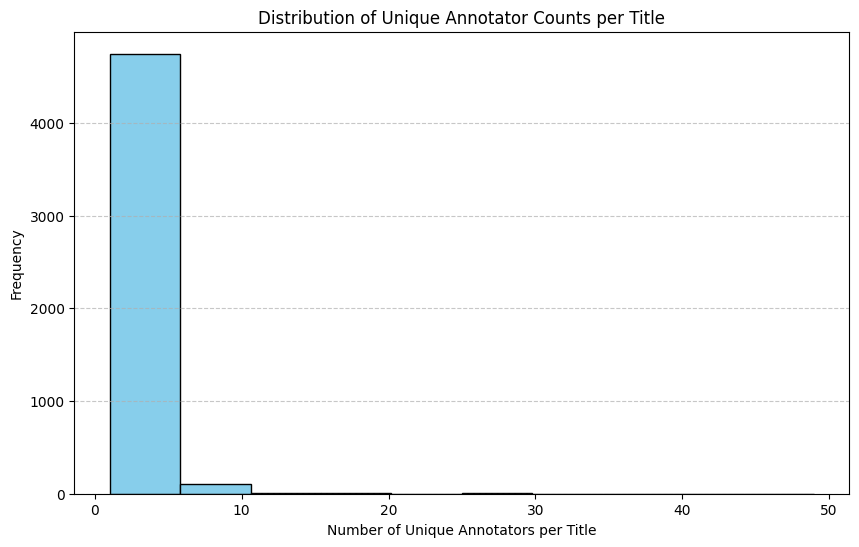

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of unique annotator counts
plt.figure(figsize=(10, 6))
plt.hist(unique_annotator_counts['Unique Annotator Count'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of Unique Annotators per Title')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Annotator Counts per Title')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Calculate the median of unique annotator counts
median_annotator_count = unique_annotator_counts['Unique Annotator Count'].median()
print(f"Median of unique annotator counts per title: {median_annotator_count}")


Median of unique annotator counts per title: 4.0


There are some outliers in the above graph therefore, the median has been used and roughly each article has been annotated by 4 people.

**EDA For the Tone**

In [ ]:
# converting the tone code into numbers
df['Tone Code'] = pd.to_numeric(df['Tone Code'], errors='coerce')


In [ ]:
unique_tone = df.groupby('Title')['Tone Code'].nunique().reset_index()
unique_tone.columns = ['Title', 'Unique Tone Count']

# Display the resulting DataFrame with unique annotator count per title
print(unique_tone)

                                                  Title  Unique Tone Count
0     !Bienvenidos!; As more Hispanic immigrants mov...                  0
1     "BLACK HAWK DOWN"; THE MOVIE; SOMALIS IN TWIN ...                  1
2     "THE IMMIGRANT" BLENDS STORY, DIALOGUE, CHARAC...                  1
3     "The economic gears of this country are depend...                  1
4     "We need new laws; we have to speak out; we ha...                  1
...                                                 ...                ...
4869           ``Sanctuary'' policy sparks radio fracas                  2
4870                             community news roundup                  1
4871                                           in brief                  1
4872                              letters to the editor                  1
4873                                two lines two lines                  0

[4874 rows x 2 columns]


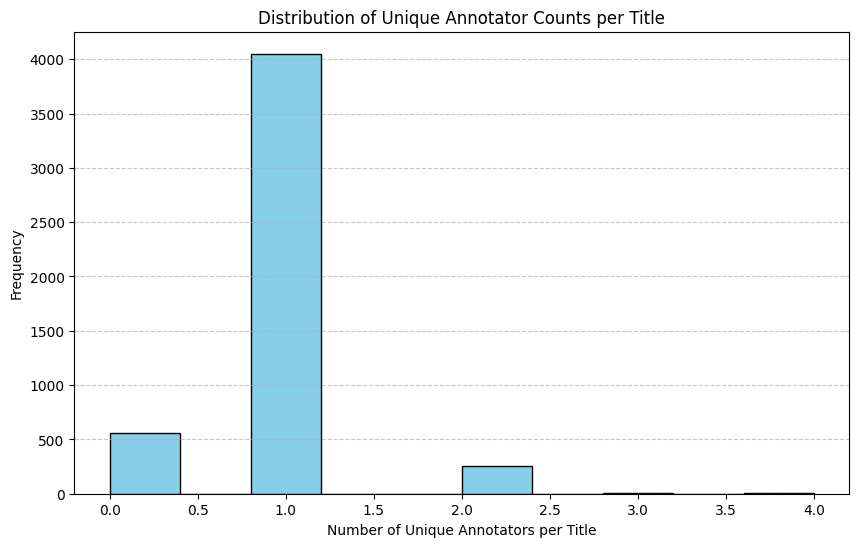

In [ ]:
# Plot the distribution of unique annotator counts
plt.figure(figsize=(10, 6))
plt.hist(unique_tone['Unique Tone Count'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of Unique Annotators per Title')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Annotator Counts per Title')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most of them have only one annotator

In [ ]:
# Calculate the median of unique annotator counts
median_annotator_count_tone = unique_tone['Unique Tone Count'].median()
print(f"Median of unique annotator counts per title: {median_annotator_count_tone}")

Median of unique annotator counts per title: 1.0


**We will deal with the Tone and the Frame Seperately so split them into two different dataframes with the title and the annotator id**

In [ ]:
# Create the tone DataFrame by selecting rows where Tone Code is not NaN
tone_df = df[['Title', 'Annotator ID', 'Tone Code']]

# Create the frame DataFrame by selecting rows where Frame Code is not NaN
frame_df = df[['Title', 'Annotator ID', 'Frame Code']]

# Display the first few rows of both DataFrames
print("Tone DataFrame:")
print(tone_df.head())

print("\nFrame DataFrame:")
print(frame_df.head())

Tone DataFrame:
                                               Title        Annotator ID  \
0  A Set of Borders to Cross; For Children Seekin...   annotator3_54.0_r   
1  A Set of Borders to Cross; For Children Seekin...  annotator11_54.0_r   
2  A Set of Borders to Cross; For Children Seekin...   annotator3_54.0_r   
3  A Set of Borders to Cross; For Children Seekin...   annotator3_54.0_r   
4  A Set of Borders to Cross; For Children Seekin...   annotator3_54.0_r   

   Tone Code  
0      17.35  
1      17.35  
2        NaN  
3        NaN  
4        NaN  

Frame DataFrame:
                                               Title        Annotator ID  \
0  A Set of Borders to Cross; For Children Seekin...   annotator3_54.0_r   
1  A Set of Borders to Cross; For Children Seekin...  annotator11_54.0_r   
2  A Set of Borders to Cross; For Children Seekin...   annotator3_54.0_r   
3  A Set of Borders to Cross; For Children Seekin...   annotator3_54.0_r   
4  A Set of Borders to Cross; For Child

In [ ]:

frame_headlines = frame_df[frame_df['Frame Code'].astype(str).str.match(r'\d+\.1')]

# Display the filtered DataFrame
print(frame_headlines.head())


                                                Title        Annotator ID  \
3   A Set of Borders to Cross; For Children Seekin...   annotator3_54.0_r   
16  A Set of Borders to Cross; For Children Seekin...  annotator11_54.0_r   
23                   LAY OFF THE GUEST WORKER WE WANT   annotator7_53.0_r   
30                   LAY OFF THE GUEST WORKER WE WANT   annotator6_53.0_r   
39  Would ban on renting to illegals make sense here?   annotator4_47.0_r   

    Frame Code  
3         10.1  
16        10.1  
23         1.1  
30         5.1  
39         5.1  


Since on an average each article is annotated by four people we can take the mode of the code which will show that most of the annotators are agreeing on a frame

In [ ]:
df_consensus = frame_headlines.groupby('Title')['Frame Code'].agg(lambda x: x.mode()[0]).reset_index()

# Rename columns for clarity
df_consensus.columns = ['Title', 'Frame Code Mode']

# Display the result
print(df_consensus.head())

                                               Title  Frame Code Mode
0  !Bienvenidos!; As more Hispanic immigrants mov...             11.1
1  "BLACK HAWK DOWN"; THE MOVIE; SOMALIS IN TWIN ...             11.1
2  "THE IMMIGRANT" BLENDS STORY, DIALOGUE, CHARAC...             11.1
3  "The economic gears of this country are depend...              1.1
4  "We need new laws; we have to speak out; we ha...              4.1


In [ ]:
# Store the DataFrame into a CSV file
df_consensus.to_csv('df_concesus.csv', index=False)

# Confirm the file has been saved
print("CSV file has been saved successfully.")


CSV file has been saved successfully.


In [ ]:
tone_df['Tone Code'] = pd.to_numeric(tone_df['Tone Code'], errors='coerce')


<ipython-input-27-a30fca513f7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tone_df['Tone Code'] = pd.to_numeric(tone_df['Tone Code'], errors='coerce')


In [ ]:
# Convert 'Tone Code' to numeric values, coercing errors to NaN
tone_df['Tone Code'] = pd.to_numeric(tone_df['Tone Code'], errors='coerce')

# Group by 'Title' and calculate the mode of the 'Tone Code'
df_tone_consensus = tone_df.groupby('Title')['Tone Code'].agg(lambda x: x.dropna().mode()[0] if not x.dropna().empty else None).reset_index()

# Rename columns for clarity
df_tone_consensus.columns = ['Title', 'Tone Code Mode']

# Display the result
print(df_tone_consensus.head())




<ipython-input-29-ecef85faecb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tone_df['Tone Code'] = pd.to_numeric(tone_df['Tone Code'], errors='coerce')


                                               Title  Tone Code Mode
0  !Bienvenidos!; As more Hispanic immigrants mov...             NaN
1  "BLACK HAWK DOWN"; THE MOVIE; SOMALIS IN TWIN ...           17.35
2  "THE IMMIGRANT" BLENDS STORY, DIALOGUE, CHARAC...           17.35
3  "The economic gears of this country are depend...           17.35
4  "We need new laws; we have to speak out; we ha...           17.40


In [ ]:
# Remove rows with NaN values
df_tone_consensus = df_tone_consensus.dropna()

# Display the result
print(df_tone_consensus.head())


                                               Title  Tone Code Mode
1  "BLACK HAWK DOWN"; THE MOVIE; SOMALIS IN TWIN ...           17.35
2  "THE IMMIGRANT" BLENDS STORY, DIALOGUE, CHARAC...           17.35
3  "The economic gears of this country are depend...           17.35
4  "We need new laws; we have to speak out; we ha...           17.40
5                                  $50,000 per entry           19.40


In [ ]:

df_tone_consensus['Tone Code Mode'] = df_tone_consensus['Tone Code Mode'].astype(int)

# Display the result
print(df_tone_consensus.head())


                                               Title  Tone Code Mode
1  "BLACK HAWK DOWN"; THE MOVIE; SOMALIS IN TWIN ...              17
2  "THE IMMIGRANT" BLENDS STORY, DIALOGUE, CHARAC...              17
3  "The economic gears of this country are depend...              17
4  "We need new laws; we have to speak out; we ha...              17
5                                  $50,000 per entry              19


In [ ]:
# Df tones consensus
# Store the DataFrame into a CSV file
df_tone_consensus.to_csv('df_tone_consensus.csv', index=False)

# Confirm the file has been saved
print("CSV file has been saved successfully.")

CSV file has been saved successfully.
